In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [2]:
# Locate the CSV file to be read.
spotify_data_path = "Resources/data.csv"

# Read the Spotify songs data.
spotify_data = pd.read_csv(spotify_data_path)

In [3]:
smaller_df = spotify_data[["name", "artists", "year", "popularity"]]
smaller_df

,name,artists,year,popularity
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4
1,Clancy Lowered the Boom,['Dennis Day'],1921,5
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5
3,Danny Boy,['Frank Parker'],1921,3
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2
5,Gati Mardika,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,6
6,The Wearing of the Green,['John McCormack'],1921,4
7,"Morceaux de fantaisie, Op. 3: No. 2, Prélude i...",['Sergei Rachmaninoff'],1921,2
8,La Mañanita - Remasterizado,['Ignacio Corsini'],1921,0
9,Il Etait Syndiqué,['Fortugé'],1921,0


In [4]:
# Establish the bins.
decade_bins = [1921, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s"]

In [5]:
# Use "pd.cut" to categorize popularity based on the bins.
smaller_df["Decade"] = pd.cut(smaller_df["year"], decade_bins, labels=labels, include_lowest=True)
smaller_df.head()

C:\Users\radov\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,artists,year,popularity,Decade
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s
3,Danny Boy,['Frank Parker'],1921,3,20s
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s


In [6]:
# Group by "Decade" and find the mean popularity of songs for each decade.
decade_popularity = pd.DataFrame(smaller_df.groupby(["Decade"]).mean()["popularity"])
decade_popularity

,popularity
Decade,
20s,1.201277
30s,2.524571
40s,2.172324
50s,12.305838
60s,27.983603
70s,35.234586
80s,37.980302
90s,44.780833
2000s,50.343601


In [7]:
# Add the Instrumentalness, Loudness, and Acousticness columns to the "smaller_df" DataFrame and match them by index.
decade_with_variables = pd.merge(smaller_df, spotify_data[["instrumentalness", "loudness", "acousticness"]], left_index=True, right_index=True)
decade_with_variables.head()

,name,artists,year,popularity,Decade,instrumentalness,loudness,acousticness
0,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...","['Sergei Rachmaninoff', 'James Levine', 'Berli...",1921,4,20s,0.878000,-20.096,0.982
1,Clancy Lowered the Boom,['Dennis Day'],1921,5,20s,0.000000,-12.441,0.732
2,Gati Bali,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,1921,5,20s,0.913000,-14.850,0.961
3,Danny Boy,['Frank Parker'],1921,3,20s,0.000028,-9.316,0.967
4,When Irish Eyes Are Smiling,['Phil Regan'],1921,2,20s,0.000002,-10.096,0.957


In [8]:
# Figure out the mean instrumentalness for each decade.
decade_instrumentalness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["instrumentalness"])
decade_instrumentalness

,instrumentalness
Decade,
20s,0.370365
30s,0.269956
40s,0.353832
50s,0.241384
60s,0.152754
70s,0.116118
80s,0.121991
90s,0.107280
2000s,0.082040


In [9]:
# Figure out the mean loudness for each decade.
decade_loudness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["loudness"])
decade_loudness

,loudness
Decade,
20s,-15.653889
30s,-14.373277
40s,-15.354801
50s,-14.733160
60s,-12.478123
70s,-11.319350
80s,-11.288637
90s,-9.698118
2000s,-7.367318


In [10]:
# Figure out the mean acousticness for each decade.
decade_acousticness = pd.DataFrame(decade_with_variables.groupby(["Decade"]).mean()["acousticness"])
decade_acousticness

,acousticness
Decade,
20s,0.838441
30s,0.849730
40s,0.871793
50s,0.832083
60s,0.593922
70s,0.382896
80s,0.303415
90s,0.303187
2000s,0.265050


# Graphing Data

## By Decade

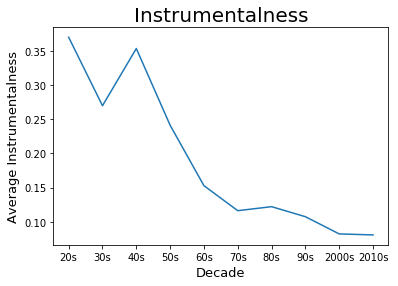

In [11]:
plt.plot(labels, decade_instrumentalness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Instrumentalness", fontdict={"fontsize": 13})
plt.title("Instrumentalness", fontdict={"fontsize": 20})
plt.show()

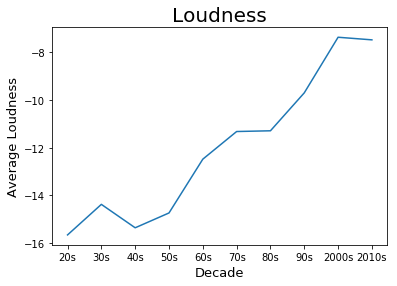

In [12]:
plt.plot(labels, decade_loudness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Loudness", fontdict={"fontsize": 13})
plt.title("Loudness", fontdict={"fontsize": 20})
plt.show()

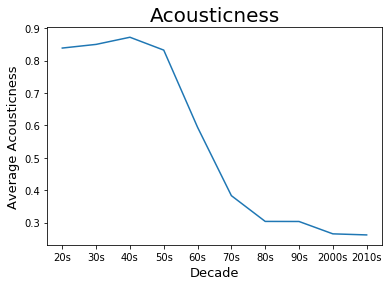

In [13]:
plt.plot(labels, decade_acousticness)
plt.xlabel("Decade", fontdict={"fontsize": 13})
plt.ylabel("Average Acousticness", fontdict={"fontsize": 13})
plt.title("Acousticness", fontdict={"fontsize": 20})
plt.show()